# Plotting Shapefiles for Hurricane Irma with GeoPandas
## Introduction
This Jupyter Notebook contains examples of using GeoPandas to map Hurricane Irma track data.

#### About the Data:
Source: https://www.nhc.noaa.gov/gis/, al112017_5day_020.zip    
Date: 09/04/2017, 9am

#### Features include:
* Geopandas - provides functionality for working with geospatial data in Python
* contextily - a python package the retrievesmaps from the internet. I use it to provide the base map.
* Multiple layers - I plot multiple shapefiles on a single map using GeoPandas's layer functionality
* Fiona - used by GeoPandas to read spatial data

## Code Examples
### Import Packages

In [72]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import fiona
import contextily as cx
from datetime import datetime

### Read shapefiles

In [2]:
shp_path_lin = './al112017_5day_020/al112017-020_5day_lin.shp'
shp_path_pgn = './al112017_5day_020/al112017-020_5day_pgn.shp'
shp_path_pts = './al112017_5day_020/al112017-020_5day_pts.shp'

map_shp_path_lin = gpd.read_file(shp_path_lin)
map_shp_path_pgn = gpd.read_file(shp_path_pgn)
map_shp_path_pts = gpd.read_file(shp_path_pts)

### Check and Convert Coordinate System
Check the EPSG code and convert to EPSG 3857 (the coordinate type that the contextily base map will likely have) if the shapefile type is different from ESPG 3857.

In [3]:
map_shp_path_lin.crs

<Geographic 2D CRS: EPSG:4035>
Name: Unknown datum based upon the Authalic Sphere
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree minute second hemisphere)
- Long[east]: Geodetic longitude (degree minute second hemisphere)
Area of Use:
- name: Not specified.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: Not specified (based on Authalic Sphere)
- Ellipsoid: Sphere
- Prime Meridian: Greenwich

In [4]:
map_shp_path_pgn.crs

<Geographic 2D CRS: EPSG:4035>
Name: Unknown datum based upon the Authalic Sphere
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree minute second hemisphere)
- Long[east]: Geodetic longitude (degree minute second hemisphere)
Area of Use:
- name: Not specified.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: Not specified (based on Authalic Sphere)
- Ellipsoid: Sphere
- Prime Meridian: Greenwich

In [5]:
map_shp_path_pts.crs

<Geographic 2D CRS: EPSG:4035>
Name: Unknown datum based upon the Authalic Sphere
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree minute second hemisphere)
- Long[east]: Geodetic longitude (degree minute second hemisphere)
Area of Use:
- name: Not specified.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: Not specified (based on Authalic Sphere)
- Ellipsoid: Sphere
- Prime Meridian: Greenwich

In [6]:
# All shapefiles have ESPG 4035. Convert to ESPG 3857.
map_shp_path_lin_3857 = map_shp_path_lin.to_crs(epsg=3857)
map_shp_path_pgn_3857 = map_shp_path_pgn.to_crs(epsg=3857)
map_shp_path_pts_3857 = map_shp_path_pts.to_crs(epsg=3857)

### Map Hurricane Track  
Map the track for Irma over a contextily base map.

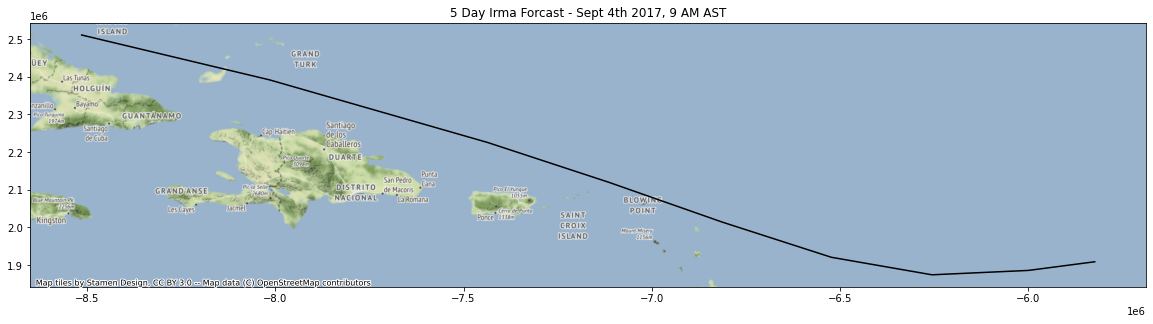

In [9]:
track = map_shp_path_lin_3857.plot(figsize=(20,20), edgecolor='k')
track.set(title='5 Day Irma Forcast - Sept 4th 2017, 9 AM AST')
cx.add_basemap(track)

contextily can split the base map into layers so I can zoom on an individual layer (such as the map labels) to make them more visible. I can also change the style of the base map.

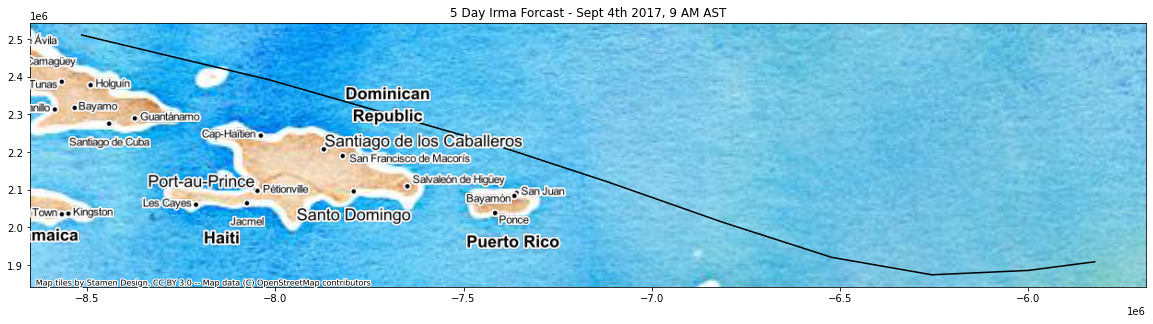

In [25]:
track = map_shp_path_lin_3857.plot(figsize=(20,20), edgecolor='k')
track.set(title='5 Day Irma Forcast - Sept 4th 2017, 9 AM AST')
cx.add_basemap(track, source=cx.providers.Stamen.Watercolor, zoom=5)
cx.add_basemap(track, source=cx.providers.Stamen.TonerLabels, zoom=6)

### Add Cone of Uncertainty and Points

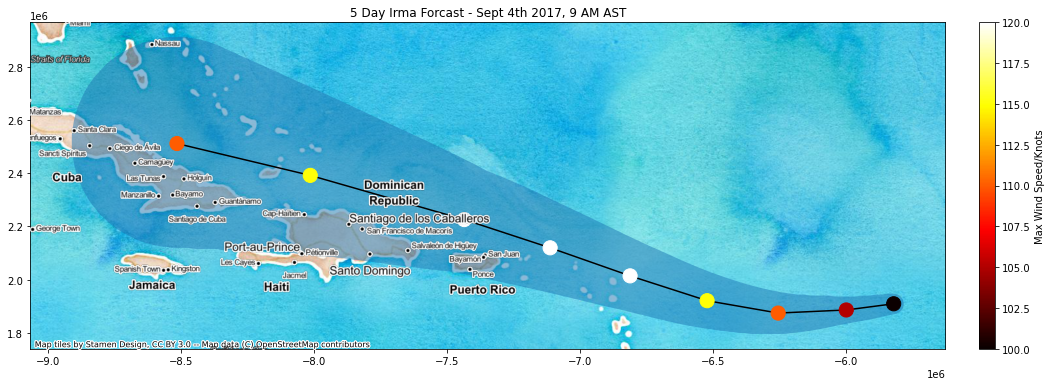

In [106]:
track = map_shp_path_lin_3857.plot(figsize=(20,20), edgecolor='k')
track.set(title='5 Day Irma Forcast - Sept 4th 2017, 9 AM AST')
map_shp_path_pgn_3857.plot(ax=track, alpha=0.5)
map_shp_path_pts_3857.plot(ax=track, column='MAXWIND', markersize=200, zorder=5, cmap='hot',
                           legend=True, legend_kwds={'label': 'Max Wind Speed/Knots',
                                                     'pad': 0.03,
                                                     'shrink': 0.3})
cx.add_basemap(track, source=cx.providers.Stamen.Watercolor, zoom=6)
cx.add_basemap(track, source=cx.providers.Stamen.TonerLabels, zoom=6)

#### Add Labels for points + axis clean up

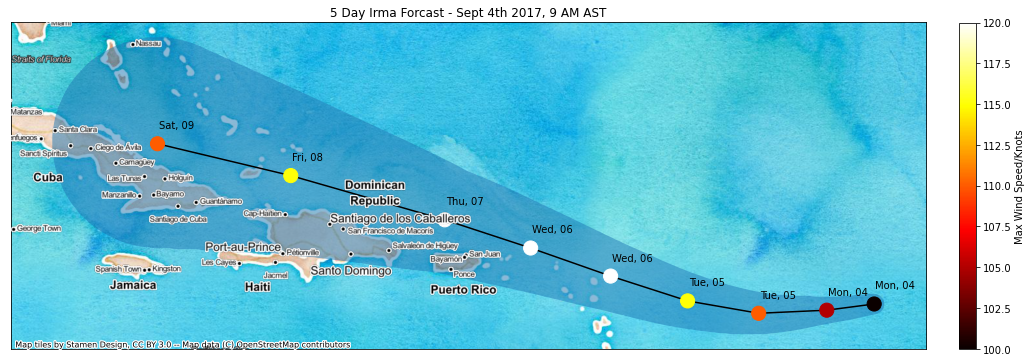

In [148]:
points = map_shp_path_pts_3857.plot(figsize=(20,20), column='MAXWIND', markersize=200, zorder=5, cmap='hot',
                           legend=True, legend_kwds={'label': 'Max Wind Speed/Knots',
                                                     'pad': 0.03,
                                                     'shrink': 0.3})
points.set(title='5 Day Irma Forcast - Sept 4th 2017, 9 AM AST')
points.get_yaxis().set_visible(False)
points.get_xaxis().set_visible(False)
map_shp_path_pts_3857.apply(lambda x: points.annotate(text=x['Date'].strftime('%a, %d'), 
                                                  xy=(x.geometry.centroid.coords[0][0]+5000, x.geometry.centroid.coords[0][1]+50000), 
                                                  ha='left', va='bottom'), axis=1)
map_shp_path_pgn_3857.plot(ax=points, alpha=0.5)
map_shp_path_lin_3857.plot(ax=points, edgecolor='k')
cx.add_basemap(points, source=cx.providers.Stamen.Watercolor, zoom=6)
cx.add_basemap(points, source=cx.providers.Stamen.TonerLabels, zoom=6)

## Scratch Work

/var/folders/ng/48fgt7dd7mz8y4n41t00t9bh0000gn/T/ipykernel_17232/3827345149.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(map_shp_path_pts_3857['FLDATELBL'])


[Text(-9000000.0, 0, '2017-09-04 2:00 AM Mon AST'),
 Text(-8500000.0, 0, '2017-09-04 2:00 PM Mon AST'),
 Text(-8000000.0, 0, '2017-09-05 2:00 AM Tue AST'),
 Text(-7500000.0, 0, '2017-09-05 2:00 PM Tue AST'),
 Text(-7000000.0, 0, '2017-09-06 2:00 AM Wed AST'),
 Text(-6500000.0, 0, '2017-09-06 2:00 PM Wed AST'),
 Text(-6000000.0, 0, '2017-09-07 2:00 AM Thu AST'),
 Text(-5500000.0, 0, '2017-09-08 2:00 AM Fri AST')]

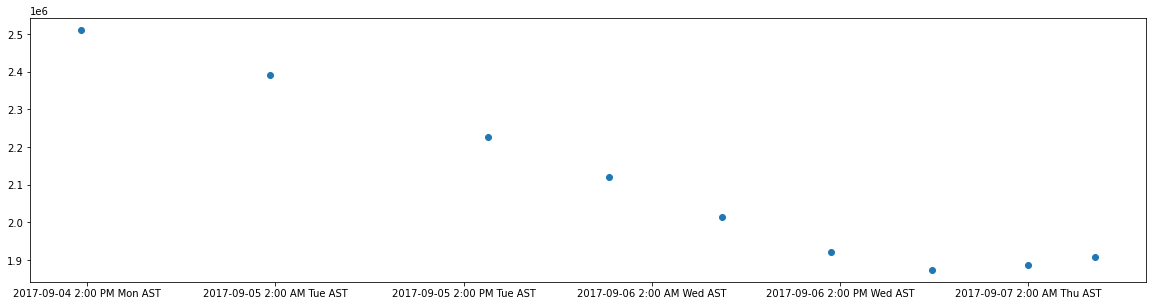

In [50]:
ax = map_shp_path_pts_3857.plot(figsize=(20,20))
ax.set_xticklabels(map_shp_path_pts_3857['FLDATELBL'])

0    Annotation(-5.82201e+06, 1.90919e+06, 'Mon, 04')
1    Annotation(-6.00012e+06, 1.88593e+06, 'Mon, 04')
2    Annotation(-6.25616e+06, 1.87431e+06, 'Tue, 05')
3    Annotation(-6.52332e+06, 1.92083e+06, 'Tue, 05')
4    Annotation(-6.81275e+06, 2.01415e+06, 'Wed, 06')
5    Annotation(-7.11332e+06, 2.11965e+06, 'Wed, 06')
6    Annotation(-7.43614e+06, 2.22571e+06, 'Thu, 07')
7      Annotation(-8.015e+06, 2.39188e+06, 'Fri, 08')
8    Annotation(-8.51594e+06, 2.51153e+06, 'Sat, 09')
dtype: object

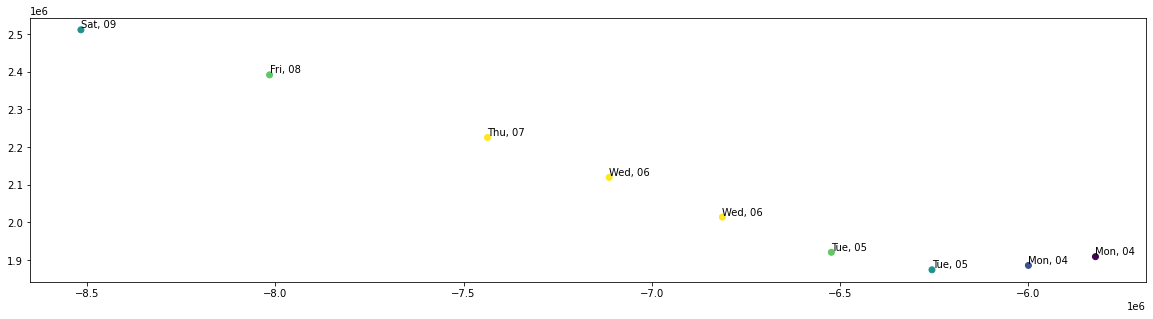

In [104]:
ax = map_shp_path_pts_3857.plot(figsize=(20,20), column='MAXWIND')
map_shp_path_pts_3857.apply(lambda x: ax.annotate(text=x['Date'].strftime('%a, %d'), 
                                                  xy=x.geometry.centroid.coords[0], 
                                                  ha='left', va='bottom'), axis=1)